<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
        Akhil Venkatesh <br>
</table>

# Lecture Notebook 2.2: SymPy & Market Equilibrium

# SymPy

In [1]:
from datascience import *
import numpy as np
from sympy import *
from sympy import solve
import sympy
init_printing()
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
%matplotlib inline
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
plt.style.use('seaborn-muted')
mpl.rcParams['figure.dpi'] = 150
import warnings
warnings.filterwarnings('ignore')

Python has many tools, such as the [SymPy library](https://docs.sympy.org/latest/tutorial/index.html) that we can use for expressing and evaluating formulas and functions in economics. 

Since SymPy helps with symbolic math, we start out by create a symbol using `Symbol`, which we assign to a variable name. Then, we can use the symbols to construct symbolic expressions.

In [2]:
x = Symbol('x');
x

**Example 1**: Now let's try using SymPy to create a symbolic expression for 2 equations. Let's create the equation for the first curve. It will be called $y$ and will be in terms of `x`

In [3]:
y = 2 * x - 3
y

Similarly, we will also use `x` to express a relationship with $y_1$

In [4]:
y_1 = 2 - x
y_1

We want to see the value of `x` at which $y = y_1$. To solve this by hand, we would set up the following equation to solve for $Q$:

$$
P_D = P_S\\
2-Q = 2Q-3
$$

Before we try solving this with SymPy, let's solve this by hand. 

$$ y = y_1 $$
$$ 2x - 3 = 2 - x $$
$$ 3x = 5 $$
$$ x = \frac{5}{3} $$

We can confirm our `Q` value is true by plugging it back into the original equation. 

$$ y = 2x - 3 $$
$$ y = 2 \times \frac{5}{3} - 3 $$
$$ y = \frac{1}{3} $$

$$ y_1 = 2 - x $$
$$ y_1 = 2 - (-\frac{5}{3}) $$
$$ y_1 = \frac{1}{3} $$

Using SymPy, we call `solve`, which takes in 2 arguments that represent the 2 sides of an equation and solves for the underlying variable such that the equation holds. Here, we pass in $P_D$ and $P_S$, both represented in terms of $Q$, to solve for the value of $Q$ such that $P_D=P_S$. It's good to know that `solve` is a custom function built for this class, and will be provided in the notebooks for you.

In [5]:
x_star = solve(y, y_1)
x_star

The value of $x$ that equates $y$ and $y_1$ is known as the optimal x value, and we denote it as $x^*$. Here, $x^* = \frac{5}{3}$. 

With $x^*$ determined, we can substitute this value as $x$ to thus calculate $y$ or $y_1$. We substitute values using the `subs` function, which follows the syntax `expression.subs(symbol_we_want_to_substitute, value_to_substitute_with)`. This let's us see if our answer was correct.

In [6]:
y.subs(x, x_star)

We can also substitute $x^*$ into $y_1$, and should get the same results.

In [7]:
y_1.subs(x, x_star)

Thus, the equilibrium `x` and `y` values are $\frac{5}{3}$ and 0.33, respectively. 

**Example 2** We will now put this in the context of suppply and demand. We can represent both as non-log functions. 

To define an upward sloping supply curve with price expressed as a function of quantity, let's define `Q` first. 


In [8]:
Q = Symbol('Q')
Q

Suppose our demand function is $\text{P}_{D}=-2 \cdot \text{Q} + 10$. $P_D$ is the price of the good purchased (how much the consumer pays). Using SymPy, this would be

In [9]:
P_D = -2 * Q + 10
P_D

The supply function is $\text{P}_{S}=3 \cdot \text{Q} + 1$. which denotes the price of the supplied good (how much the producer earns), in terms of $Q$.Using SymPy, this would be


In [10]:
P_S = 3 * Q + 1
P_S

We will now try to find the market equilibrium. The market price equilibrium $P^*$ is the price at which the quantity supplied and quantity demanded of a good or service are equal to each other. Similarly, the market quantity equilibrium $Q^*$ is the quantity at which the price paid by consumers is equal to the price received by producers. 

To solve for the equilibrium given the supply and demand curve, we know that the price paid by consumers must equal to the price earned by suppliers. Thus, $P_D = P_S$, allowing us to set the two equations equal to each other and solve for the equilibrium quantity and thus equilibrium price.

Combined, the price equilibrium and quantity equilibrium form a point on the graph with quantity and price as its axes, called the equilibrium point. This point is the point at which the demand and supply curves intersect.

Let's take a step back and solve this by hand first.

$$ P_D = P_S $$
$$ -2Q + 10 = 3Q + 1 $$
$$ 5Q = 9 $$
$$ Q = \frac{9}{5} $$

Now that we have our optimal Q value, let's plug it in each equation and see if our condition holds true. 

$$ P_D = -2Q + 10 $$
$$ P_D = -2 \times \frac{9}{5} + 10 $$
$$ P_D = \frac{32}{5} = 6.4 $$

$$ P_S = 3Q + 1 $$
$$ P_S = 3 \times \frac{9}{5} + 1 $$
$$ P_S = \frac{32}{5} = 6.4 $$

Now, let's use SymPy

First, we solve for the quantity equilibrium.

In [11]:
Q_star = solve(P_D, P_S)
Q_star

Next, we plug the quantity equilibrium into our demand or supply expression to get the price equilibrium

In [12]:
P_S.subs(Q, Q_star)

Graphically, we can plot the supply and demand curves with quantity on the $x$ axis and price on the $y$ axis. The point at which they intersect is the equilibrium point.

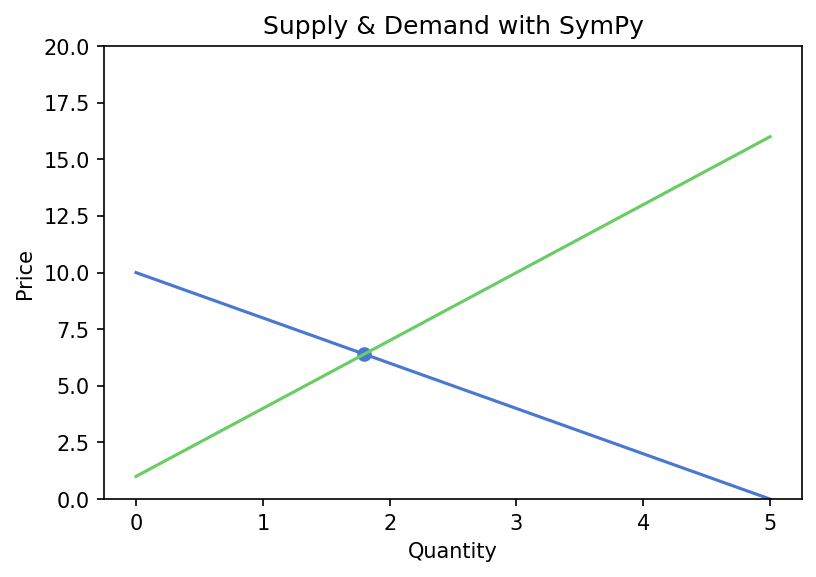

In [13]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(P_D, 0, 5)
plot_equation(P_S, 0, 5)
plt.ylim(0,20)
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.title("Supply & Demand with SymPy")
plot_intercept(P_D, P_S);

# Market Equilibrium with Real Data

We will now explore the relationship between price and quantity of oranges produced between 1924 and 1938. Since the [data](https://data-88e.github.io/textbook/content/references.html#demand-fruits) is from the 1920s and 1930s, it is important to remember that the prices are much lower than what they would be today because of inflation, competition, innovations, and other factors. For example, in 1924, a ton of oranges would have costed $\$6.63$; that same amount in 2019 is \$100.78, holding all factors except for inflation constant. 

Remember, the **market equilibrium** is the price and quantity at which the demand and supply curves intersect. The price and resulting transaction quantity at the equilibrium is what we would predict to observe in the market. This is the point at which the demand and supply curves meet and represents the "optimal" level of production and price in that market.

In [14]:
fruitprice = Table.read_table('fruitprice.csv')
fruitprice

Year,Pear Price,Pear Unloads (Tons),Plum Price,Plum Unloads,Peach Price,Peach Unloads,Orange Price,Orange Unloads,NY Factory Wages
1924,8.04,18489,8.86,6582,4.96,41880,6.63,21258,27.22
1925,5.67,21919,7.27,5526,4.87,38772,9.19,15426,28.03
1926,5.44,29328,6.68,5742,3.35,46516,7.2,24762,28.89
1927,7.15,17082,8.09,5758,5.7,32500,8.63,22766,29.14
1928,5.81,20708,7.41,6000,4.13,46820,10.71,18766,29.34
1929,7.6,13071,10.86,3504,6.7,36990,6.36,35702,29.97
1930,5.06,22068,6.23,7998,6.35,29680,10.5,23718,28.68
1931,5.4,19255,6.86,5638,3.91,50940,5.81,39263,26.35
1932,4.06,17293,6.09,7364,4.57,27642,4.71,38553,21.98
1933,4.78,11063,5.86,8136,3.57,35560,4.6,36540,22.26


Let's walk through how to the market equilibrium using the market for oranges as an example.

### Data Preprocessing

Because we are only examining the relationship between prices and quantity for oranges, we can create a new table with the relevant columns: `Year`, `Orange Price`, and `Orange Unloads`. Here, `Orange Price` is measured in dollars, while `Orange Unloads` is measured in tons.

In [15]:
oranges_raw = fruitprice.select("Year", "Orange Price", "Orange Unloads")
oranges_raw

Year,Orange Price,Orange Unloads
1924,6.63,21258
1925,9.19,15426
1926,7.2,24762
1927,8.63,22766
1928,10.71,18766
1929,6.36,35702
1930,10.5,23718
1931,5.81,39263
1932,4.71,38553
1933,4.6,36540


Next, we will rename our columns. In this case, let's rename `Orange Unloads` to `Quantity` and `Orange Price` to `Price` for brevity and understandability. 

In [16]:
oranges = oranges_raw.relabel("Orange Unloads", "Quantity").relabel("Orange Price", "Price")
oranges

Year,Price,Quantity
1924,6.63,21258
1925,9.19,15426
1926,7.2,24762
1927,8.63,22766
1928,10.71,18766
1929,6.36,35702
1930,10.5,23718
1931,5.81,39263
1932,4.71,38553
1933,4.6,36540


### Visualize the  Relationship

Let's first take a look to see what the relationship between price and quantity is. We would expect to see a downward-sloping relationship between price and quantity; if a product's price increases, consumers will purchase less, and if a product's price decreases, then consumers will purchase more. 

We will create a scatterplot between the points.

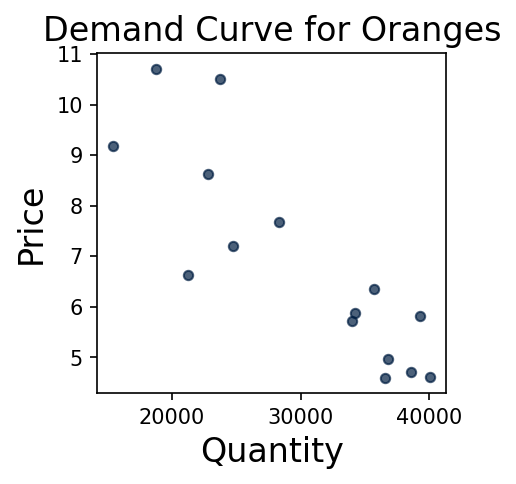

In [17]:
oranges.scatter("Quantity", "Price", width=3, height=3)
plt.title("Demand Curve for Oranges", fontsize = 16);

### Fit a Polynomial

We will now quantify our demand curve using NumPy's [`np.polyfit` function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Recall that `np.polyfit` returns an array of size 2, where the first element is the slope and the second is the $y$-intercept.

For this exercise, we will be expressing demand and supply as quantities in terms of price. 

In [18]:
orange_parameters = np.polyfit(oranges.column("Price"), oranges.column("Quantity"), 1)
print ("The coefficient is", orange_parameters[0])
print ("The y-intercept is", orange_parameters[1])

The coefficient is -3432.84670093
The y-intercept is 53625.8748401


This shows that the demand curve is $D(P) = -3433 P+ 53626$. The slope is -3433 and $y$-intercept is 53626. That means that as price increases by 1 unit (in this case, \$1), quantity decreases by 3433 units (in this case, 3433 tons). 


### Create the Demand Curve

We will now use SymPy to write out this demand curve. To do so, we start by creating a symbol `P` that we can use to create the equation.

In [19]:
P = sympy.Symbol("P")
demand = orange_parameters[0] * P + orange_parameters[1]
demand

### Create the Supply Curve

As the price of the oranges increases, the quantity of oranges that orange manufacturers are willing to supply increases. They capture the producer's side of market decisions and are upward-sloping.

Let's now assume that the supply curve is given by $S(P) = 4348P$. (Note that this supply curve is not based on data.)

In [20]:
supply_coefficient = 4348
supply = supply_coefficient * P
supply

 This means that as the price of oranges increases by 1, the quantity supplied increases by 4348. At a price of 0, no oranges are supplied.

### Find the Price Equilibrium
The equilbrium consists of 2 components: the quantity equilbrium and price equilbrium. 
The price equilibrium is the price at which the supply curve and demand curve intersect: the price of the good that consumers desire to purchase at is equivalent to the price of the good that producers want to sell at. There is no shortage of surplus of the product at this price.


Let's find the price equilibrium. To do this, we will use the provided `solve` function. This is a custom function that leverages some SymPy magic and will be provided to you in assignments.

In [21]:
P_star = solve(demand, supply)
P_star

This means that the price of oranges that consumers want to purchase at and producers want to provide is about \$6.89. 

### Find the Quantity Equilibrium

Similarly, the quantity equilibrium is the quantity of the good that consumers desire to purchase is equivalent to the quantity of the good that producers supply; there is no shortage or surplus of the good at this quantity. 



In [22]:
demand.subs(P, P_star)

In [23]:
supply.subs(P, P_star)

This means that the number of tons of oranges that consumers want to purchase and producers want to provide in this market is about 29,967 tons of oranges. 

### Visualize the Market Equilibrium 

Now that we have our demand and supply curves and price and quantity equilibria, we can visualize them on a graph to see what they look like. 

In [24]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_quantities, plot_prices, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([why], [ex], zorder=10, color="tab:orange")
    return (ex, why)

We can leverage these functions and the equations we made earlier to create a graph that shows the market equilibrium.

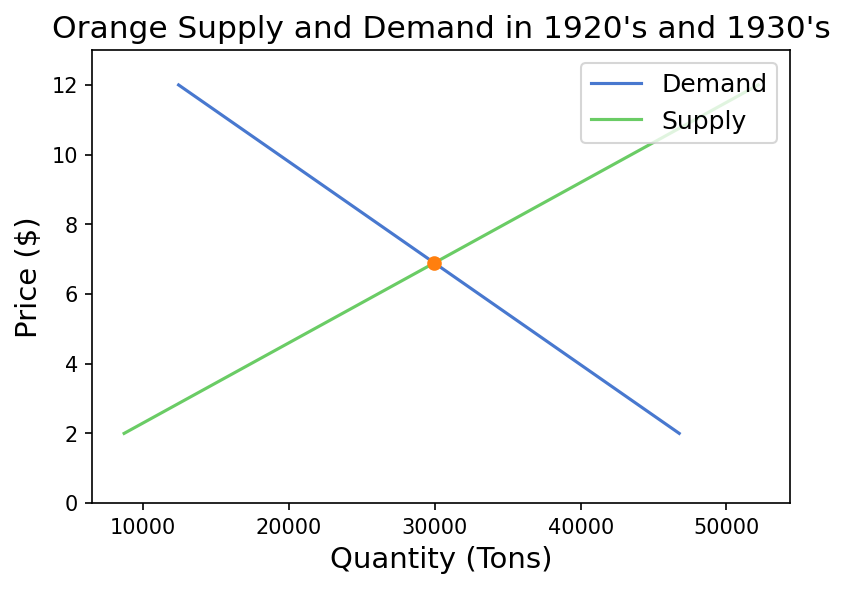

In [25]:
plot_equation(demand, 2, 12, label = "Demand")
plot_equation(supply, 2, 12, label = "Supply")
plt.ylim(0,13)
plt.title("Orange Supply and Demand in 1920's and 1930's", fontsize = 15)
plt.xlabel("Quantity (Tons)", fontsize = 14)
plt.ylabel("Price ($)", fontsize = 14)
plot_intercept(supply, demand)
plt.legend(loc = "upper right", fontsize = 12)
plt.show()

You can also practice on your own and download additional data sets [here](http://users.stat.ufl.edu/~winner/datasets.html), courtesy of the University of Flordia's Statistics Department. 